1\. **Text files**

Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named `data_int.txt`. Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named `data_float.txt`. Use the `cat` command to print the content of the file.
+ load the `txt` file of the previous point and convert it to a `csv` file by hand.

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import struct

In [2]:
int_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
with open('data_int.txt', 'w') as file:
    for number in int_numbers:
        file.write(f"{number}\n")
!type data_int.txt
print('\n')


float_matrix = np.random.rand(5, 5)
np.savetxt('data_float.txt', float_matrix)
!type data_float.txt
print('\n')


loaded_data = np.loadtxt('data_float.txt')
np.savetxt('data_float.csv', loaded_data, delimiter=',')
!type data_float.csv


1
2
3
4
5
6
7
8
9
10


7.518201672610750341e-01 6.118314505899541400e-01 5.512582242667153354e-01 4.455452627546171440e-01 1.887453341450168187e-01
5.436222891732326312e-01 5.852792391312091613e-01 3.792940716640269549e-01 7.450738299312079649e-01 5.727160257162853263e-01
2.598907405181517527e-01 8.346955207367940943e-01 4.742686344621563910e-01 9.155289168678703016e-01 6.162439617782122792e-02
9.017999522315389704e-02 1.137371022451846292e-01 3.791573313276445090e-01 2.639723952816310781e-01 5.648676068274207651e-01
4.085539426878173064e-01 5.351745549739045371e-01 3.551960828123742475e-01 3.298852729748869006e-01 8.241375428199002595e-01


7.518201672610750341e-01,6.118314505899541400e-01,5.512582242667153354e-01,4.455452627546171440e-01,1.887453341450168187e-01
5.436222891732326312e-01,5.852792391312091613e-01,3.792940716640269549e-01,7.450738299312079649e-01,5.727160257162853263e-01
2.598907405181517527e-01,8.346955207367940943e-01,4.742686344621563910e-01,9.155289168678703016e-01,

2\. **JSON files**

Load the file `user_data.json`, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [3]:

file_path = "./data/user_data.json"
df = pd.read_json(file_path)
filtered_df = df[df['CreditCardType'] == 'American Express']
#save as csv
filtered_df.to_csv('./data/filtered_data.csv', index=False)

print(filtered_df.head())


    ID             JobTitle                      EmailAddress  \
1    2  Investment  Advisor      Clint_Thorpe5003@bulaffy.com   
11  12       Retail Trainee  Phillip_Carpenter9505@famism.biz   
27  28      Project Manager       Russel_Graves1378@extex.org   
38  39          Stockbroker      Leanne_Newton1268@typill.biz   
56  57       Budget Analyst         Tony_Giles1960@iatim.tech   

    FirstNameLastName           CreditCard    CreditCardType  
1        Clint Thorpe  7083-8766-0251-2345  American Express  
11  Phillip Carpenter  3657-0088-0820-5247  American Express  
27      Russel Graves  6718-4818-8011-6024  American Express  
38      Leanne Newton  5438-0816-4166-4847  American Express  
56         Tony Giles  8130-3425-7573-7745  American Express  


3\. **CSV files with Pandas**

Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [4]:

df = pd.read_csv('./data/mushrooms_categorized.csv')
print(df.head())

average_values = df.groupby('class').mean()
print("avegrage value:")
print(average_values)

df.to_json('./data/mushrooms_categorized.json', orient='records', lines=True)


   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

4\. **Reading a database**

Get the database `sakila.db` from the lecture `06_dataio.ipynb`, and import the table `actors` as a Pandas dataframe. Using the dataframe, count how many actors have a first name that begins with `A`.

*Hint:* use the Series `.str` method to apply the Python string methods to the elements of a Series, see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html).

In [5]:

conn = sqlite3.connect('./data/sakila.db')


query = 'SELECT * FROM actor;'
df_actors = pd.read_sql_query(query, conn)


count_actors_with_A = df_actors[df_actors['first_name'].str.startswith('A')].shape[0]
conn.close()
print("Number of actors with starting with an A:", count_actors_with_A)


Number of actors with starting with an A: 13


5\. **Reading the credit card numbers**

Get the binary file named `credit_card.dat` from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [17]:
def bits_to_decimal(bits):
    return int(bits, 2) % 10 #I don't understand why using chr() function because on some blocs of 6 bits, it can return a letter  
                            # So 6 bits = int between 0 and 63 -> i only take the right digit because i don't know what to take
def extract_credit_card_number(bits):
    card_number = ""
    for i in range(0, len(bits), 6):
        block = bits[i:i+6]
        decimal_value = bits_to_decimal(block)
        card_number += str(decimal_value)

    return card_number

def process_file(file_path):
    with open(file_path, 'rb') as file:
        bits = ''.join(format(byte, '08b') for byte in file.read())

    credit_card_numbers = []
    for i in range(0, len(bits), 114):  # 19 blocs de 6 bits * 6 bits par bloc
        card_number = extract_credit_card_number(bits[i:i+114])
        credit_card_numbers.append(card_number)

    return credit_card_numbers

file_path = "./data/credit_card.dat"
credit_card_numbers = process_file(file_path)

formatted_credit_card_numbers = []
for card_number in credit_card_numbers:
    formatted_number = ''.join(' ' if (i+1) % 5 == 0 else digit for i, digit in enumerate(card_number))
    formatted_credit_card_numbers.append(formatted_number)

for i, card_number in enumerate(formatted_credit_card_numbers, start=1):
    print("Credit Card number", i," : ", card_number)


Credit Card number 1  :  2948 9492 4829 8294
Credit Card number 2  :  8290 2949 3082 0823
Credit Card number 3  :  0829 8290 2948 9482
Credit Card number 4  :  9482 4929 8234 2908
Credit Card number 5  :  2308 9482 4929 8294
Credit Card number 6  :  9294 2949 9482 0929
Credit Card number 7  :  0823 8294 2348 9482
Credit Card number 8  :  3482 4829 9294 2309
Credit Card number 9  :  2909 0092 0829 9290
Credit Card number 10  :  8290 2909 3492 0929
Credit Card number 11  :  4923 8230 2948 3092
Credit Card number 12  :  9082 0929 9230 2909
Credit Card number 13  :  2949 3082 0929 8294
Credit Card number 14  :  9290 2949 9092 4929
Credit Card number 15  :  0923 9230 2309 9082
Credit Card number 16  :  9092 0829 9290 2909
Credit Card number 17  :  2909 9092 4825 9230
Credit Card number 18  :  9234 2349 9492 0923
Credit Card number 19  :  4923 9234 2308 3492
Credit Card number 20  :  3082 4923 8234 2308
Credit Card number 21  :  2349 3082 4823 8234
Credit Card number 22  :  9234 2349 3082 49

6\. **Write data to a binary file**

a) Start from the `data/data_000637.txt` file that we have used during the previous lectures, and convert it to a binary file according to the format defined below:

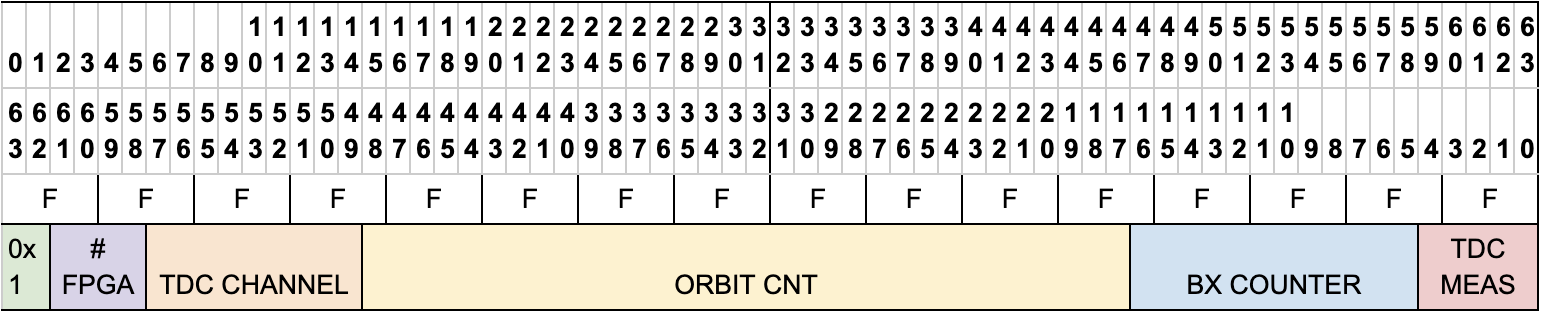

In [7]:
from IPython.display import Image
Image("data/data_format.png")

*Hints*:
- Read the first 10 lines using Pandas
- Iterate over the DataFrame rows
- For every row, "pack" the values (features) into a single 64-bit word, according to the format specified above. Use bit-wise shifts and operators to do so.
- Write each 64-bit word to a binary file. You can use `struct` in this way:
```
binary_file.write( struct.pack('<q', word) )
```
where `word` is the 64-bit word.
- Close the file after completing the loop.

b) Check that the binary file is correctly written by reading it with the code used in the lecture `06_dataio.ipynb`, and verify that the content of the `txt` and binary files is consistent.

c) What is the difference of the size on disk between equivalent `txt` and binary files?

In [8]:

df = pd.read_csv('data/data_000637.txt', nrows=10)
